# Lab 2: Numpy, Pandas and Matplotlib

## 1. Numpy

1. What are the differences between Numpy's array and Python's list?

> <br />
> 1. 
>    - Numpy can create array faster (than python create list) with efficient and manipulating numerical data inside them. <br /><br />
> 2. <br />
>    - Python's list can contain different data types in same list `called heterogeneous`. <br />
>    - Numpy's array elements must have the same data type `called homogeneous`. <br /><br />
> 3. 
>    - Numpy's array use less memory (than python's list) to store data and it provides a mechanism of specifying the data types. <br /><br />
> 4. 
>    - Numpy arrays have a `fixed size` at creation, unlike Python lists (can grow dynamically), so changing the size will create a new array and delete the original. <br /><br />

2. What are the advantages of using Numpy over Python's list for numerical computing?

> <br />
> Numpy support some specific scientific features <br /><br />
>   - linear algebra <br />
>   - vectorized operations <br /><br />
> which python cannot support these features. <br />
> <br />

3. Give 4 example on how Numpy's ndarray can be created.

In [83]:
import numpy as np

# Convert from Python's list
arr1 = np.array(['x', 'y', 'z'])
print(type(arr1))
arr1

<class 'numpy.ndarray'>


array(['x', 'y', 'z'], dtype='<U1')

In [3]:
# generate by np.zeros() : all element has zero as initial value
arr2 = np.zeros((4, 3))
print(type(arr2))
arr2

<class 'numpy.ndarray'>


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [4]:
# generate by np.eye() : identity matrix
arr3 = np.eye(3)
print(type(arr3))
arr3

<class 'numpy.ndarray'>


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
# generate by np.linspace(start, stop, step)
arr4 = np.linspace(1, 9, 5)
print(type(arr4))
arr4

<class 'numpy.ndarray'>


array([1., 3., 5., 7., 9.])

4. Give an example of Numpy's functions that change the shape of ndarray? Also provide
short description of each function.

In [6]:
# initial array
arr_bf = np.arange(4)
print(arr_bf)
print("arr_bf shape : ", arr_bf.shape, "\n")

# use reshape(row, col) : C-like index ordering
arr_reshape_c = np.reshape(arr_bf, (2, 2))
print(arr_reshape_c)
print("arr_reshape_c shape : ", arr_reshape_c.shape, "\n")

# use reshape(row, col) : Fortran-like index ordering
arr_reshape_f = np.reshape(arr_bf, (2, 2), order='F')
print(arr_reshape_f) 
print("arr_reshape_f shape : ", arr_reshape_f.shape, "\n")

# use transpose : row ⇋ column (with 2D-array)
arr_t = np.transpose([arr_bf])
print(arr_t) 
print("arr_t shape : ", arr_t.shape)


[0 1 2 3]
arr_bf shape :  (4,) 

[[0 1]
 [2 3]]
arr_reshape_c shape :  (2, 2) 

[[0 2]
 [1 3]]
arr_reshape_f shape :  (2, 2) 

[[0]
 [1]
 [2]
 [3]]
arr_t shape :  (4, 1)


## 2. Pandas

In [81]:
import pandas as pd

1. What are two main data structure of Pandas? How are they differs and when should each be
used?

> <br />
> 1. Series <br />
>   - one-dimensional labeled array, can holding any data type <br />
>   - data inside can bring from `ndarray`, `scalar value`, or `dictionary` <br />
>   - should use when having 1D array <br /><br />
> 2. Dataframe <br />
>   - two-dimensional labeled structure <br />
>   - data inside can bring from `1D : ndarrays, lists, dicts, Series`, `2D numpy's array`, or `another Dataframe` <br />
>   - should use for managing `spreadsheet`, `SQL table`, or any 2D table <br />
> <br />

2. Give an example on how Pandas DataFrame can be created.

In [84]:
# data : empty
df1 = pd.DataFrame()
print("* Empty Dataframe")
print(df1, "\n")

# data : dictionary of ndarrays
df2 = pd.DataFrame({
    'a' : np.arange(4),
    'b' : np.zeros(4)
})
print("* Dataframe from Dictionary of ndarrays")
print(df2)

* Empty Dataframe
Empty DataFrame
Columns: []
Index: [] 

* Dataframe from Dictionary of ndarrays
   a    b
0  0  0.0
1  1  0.0
2  2  0.0
3  3  0.0


3. What is the difference between df.loc and df.iloc in data selection?

> - df.loc : choose rows & columns by specific `label`
> - df.iloc : choose rowa & columns at specific `index position`

4. Why is it necessary to explore the cause of missing data? Can't we just drop it?

> <br />
> Because sometimes if the value of some block have no value and have to calculate from the exist data, the blank data would effect to the new data. <br />
> For example, when calculate average from data but have some missing data, the amount of data maybe more than the data that having then average maybe incorrect. <br />
> Or it maybe cannot calculate because do not know the data type of the value and got error. <br /><br />


5. What is the difference between df.apply and df.transform ?

> 
> - df.transform cannot produce aggregated results.
> - df.apply works with multiple Series at a time, df.transform can work with a single Series at a time.
> - df.transform works with function, a string function, a list of functions, and a dict. df.apply is only work for function.
> 

6. Give an example of Pandas functions that transform the shape of dataframe.

In [106]:
# initial dataframe
df = pd.DataFrame({
    'a' : np.arange(4),
    'b' : np.zeros(4)
})

df

,a,b
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0


In [93]:
# row ⇋ col
df.transpose()

,0,1,2,3
a,0.0,1.0,2.0,3.0
b,0.0,0.0,0.0,0.0


In [108]:
# index from a, column from b
df = pd.pivot(df, index=['a'], columns='b') 
df

a
0
1
2
3


7. From superstore dataset, prepare the dataset to answer following question. Provide explanation on each step as well.

In [3]:
data_order = pd.read_csv(r'../public/data/superstore_order.csv')
data_people = pd.read_csv(r'../public/data/superstore_people.csv')
data_return = pd.read_csv(r'../public/data/superstore_return.csv')

<pre>       1. Observe the weekly sales of each product </pre>

In [10]:
df_order = pd.DataFrame(data_order.copy())
df_week_order = df_order
df_week_order['Order Date'] = pd.to_datetime(df_week_order['Order Date'], dayfirst=True) - pd.to_timedelta(7, unit='d')
df_count = df_week_order[['Order Date', 'Product ID']].value_counts().reset_index()
df_count.columns = ['Order Date', 'Product ID', 'Count']
print(df_count.groupby([pd.Grouper(key='Order Date', freq='w'), 'Product ID'])['Count'].sum())


Order Date  Product ID     
2013-12-29  OFF-AR-10003478    1
            OFF-BI-10004094    1
            OFF-LA-10003223    1
            OFF-PA-10000174    1
            OFF-ST-10002743    1
                              ..
2017-12-24  TEC-PH-10000347    1
            TEC-PH-10000576    1
            TEC-PH-10002563    1
            TEC-PH-10002890    1
            TEC-PH-10004774    1
Name: Count, Length: 8745, dtype: int64


<pre>       2. Find out which customers have returned products at least once </pre>

In [11]:
df_order = pd.DataFrame(data_order.copy())
df_return = pd.DataFrame(data_return.copy())
df_order.apply(lambda row: row[df_order['Order ID'].isin( df_return['Order ID'] )])['Customer Name'].unique()

array(['Zuschuss Donatelli', 'Ted Butterfield', 'Jim Sink',
       'Lena Creighton', 'Bruce Stewart', 'Victoria Wilson',
       'Joni Blumstein', 'Grace Kelly', 'Alejandro Savely',
       'Philip Brown', 'Mike Kennedy', 'Philisse Overcash',
       'Troy Blackwell', 'Tanja Norvell', 'Michelle Tran',
       'Maribeth Yedwab', 'Dean Braden', 'Erin Smith', 'Frank Preis',
       'Zuschuss Carroll', 'Fred McMath', 'Rick Bensley', 'Dorris liebe',
       'Nick Zandusky', 'Carlos Daly', 'Chuck Clark', 'Jill Stevenson',
       'Logan Currie', 'Brian Moss', 'Greg Hansen', 'Phillina Ober',
       'Roland Fjeld', 'John Stevenson', 'Deanra Eno', 'Erica Hernandez',
       'Naresj Patel', 'Noel Staavos', 'Neoma Murray',
       'Russell Applegate', 'Larry Tron', 'Harold Ryan',
       'Bradley Talbott', 'Linda Southworth', 'Stefania Perrino',
       'Greg Matthias', 'Erica Bern', 'Henry Goldwyn', 'Laurel Workman',
       'Valerie Dominguez', 'Katherine Murray', 'Beth Thompson',
       'Joel Eaton', 'Lin

<pre>       3. Sales to profit ratio of each subcategory </pre>

In [12]:
df_order = pd.DataFrame(data_order.copy())
sale_to_pro = df_order.groupby(['Sub-Category'])[['Sales','Profit']].sum()
sale_to_pro['Sales/Profit'] = sale_to_pro['Sales'] / sale_to_pro['Profit']
sale_to_pro

,Sales,Profit,Sales/Profit
Sub-Category,,,
Accessories,151054.3940,38456.8536,3.927893
Appliances,95924.5270,15887.0741,6.037898
Art,24141.6560,5778.5500,4.177805
Binders,167278.8660,23106.6372,7.239429
Bookcases,97751.4547,-3422.9518,-28.557649
Chairs,286036.3570,23684.8637,12.076758
Copiers,140448.1820,52132.8809,2.694042
Envelopes,15334.9320,6499.0098,2.359580
Fasteners,2816.0740,881.3539,3.195168


<pre>       4. Orders that takes more than 5 days to prepare for shipping </pre>

In [13]:
df_order = pd.DataFrame(data_order.copy())
df_order['Pre_Shipping'] = (pd.to_datetime(df_order['Ship Date'], dayfirst=True)- pd.to_datetime(df_order['Order Date'], dayfirst=True) ).dt.days
df_order.query('Pre_Shipping > 5')
# df_order.query('"Order Date" - "Ship Date" > 5 ')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Pre_Shipping
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164,7
16,17,CA-2014-105893,11/11/2014,18/11/2014,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,...,Central,OFF-ST-10004186,Office Supplies,Storage,Stur-D-Stor Shelving Vertical 5-Shelf: 72H x 3...,665.8800,6,0.00,13.3176,7
53,54,CA-2016-105816,11/12/2016,17/12/2016,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,East,OFF-FA-10000304,Office Supplies,Fasteners,Advantus Push Pins,15.2600,7,0.00,6.2566,6
54,55,CA-2016-105816,11/12/2016,17/12/2016,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,East,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.9500,5,0.00,298.6855,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8865,8866,CA-2015-158148,20/12/2015,26/12/2015,Standard Class,JM-15865,John Murray,Consumer,United States,Arlington,...,South,OFF-AP-10003281,Office Supplies,Appliances,Acco 6 Outlet Guardian Standard Surge Suppressor,36.2700,3,0.00,10.8810,6
8875,8876,US-2016-141264,13/08/2016,19/08/2016,Standard Class,CT-11995,Carol Triggs,Consumer,United States,Irving,...,Central,OFF-SU-10003505,Office Supplies,Supplies,Premier Electric Letter Opener,185.3760,2,0.20,-34.7580,6
8876,8877,US-2016-141264,13/08/2016,19/08/2016,Standard Class,CT-11995,Carol Triggs,Consumer,United States,Irving,...,Central,OFF-AP-10002534,Office Supplies,Appliances,3.6 Cubic Foot Counter Height Office Refrigerator,58.9240,1,0.80,-153.2024,6
8877,8878,CA-2017-126928,17/09/2017,23/09/2017,Standard Class,GZ-14470,Gary Zandusky,Consumer,United States,Morristown,...,East,TEC-MA-10004626,Technology,Machines,Lexmark 20R1285 X6650 Wireless All-in-One Printer,480.0000,4,0.00,225.6000,6


<pre>       5. Shipping method distribution on each state </pre>

In [14]:
df_order = pd.DataFrame(data_order.copy())
df_order.groupby(['State', 'Ship Mode'])['Order ID'].nunique()

State      Ship Mode     
Alabama    First Class        4
           Same Day           1
           Second Class       8
           Standard Class    18
Arizona    First Class       16
                             ..
Wisconsin  First Class        9
           Same Day           2
           Second Class       5
           Standard Class    27
Wyoming    Standard Class     1
Name: Order ID, Length: 173, dtype: int64

## 3. Matplotlib

From superstore dataset, plot visualization to answer following question using appropriate visual element.

1. Number of customer who has returned product atleast once and those who never returned
products.

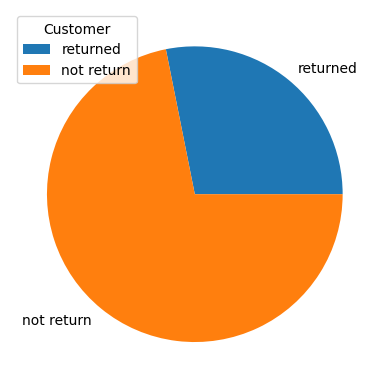

In [10]:
import matplotlib.pyplot as plt

df_order = pd.DataFrame(data_order.copy())
df_return = pd.DataFrame(data_return.copy())
count_return = df_order.apply(lambda row: row[df_order['Order ID'].isin( df_return['Order ID'] )])['Customer Name'].nunique()
count_all = df_order['Customer Name'].nunique() - count_return

plt.pie([count_return, count_all], labels = ['returned', 'not return'])
plt.legend(title = "Customer")
plt.show() 


2. Weekly sales of each product category.

<AxesSubplot: ylabel='Frequency'>

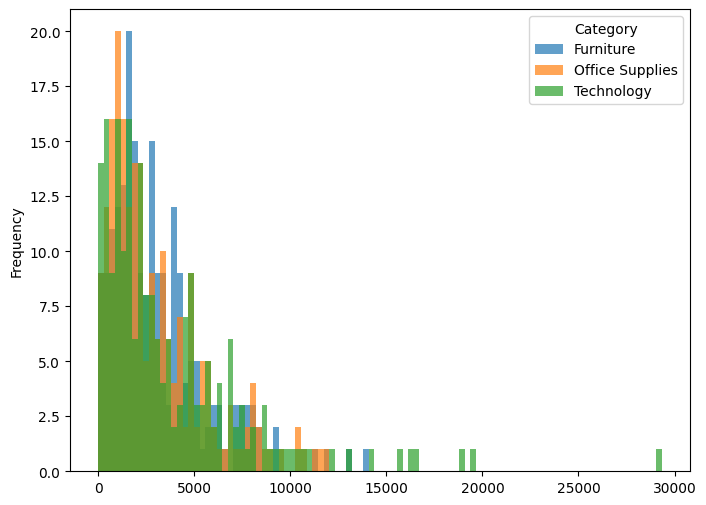

In [37]:
import pandas as pd

df_order = pd.DataFrame(data_order.copy())
df_week_order = df_order
df_week_order['Order Date'] = pd.to_datetime(df_week_order['Order Date'], dayfirst=True) - pd.to_timedelta(7, unit='d')
df_category = df_week_order.groupby([pd.Grouper(key='Order Date', freq='w'), 'Category'])['Sales'].sum().reset_index()
df_category.columns = ['Order Date', 'Category', 'Sales']
df_category = df_category.pivot(columns='Category', index='Order Date', values='Sales')
df_category.plot.hist(bins=100, figsize=(8,6), alpha=0.7)


3. Distribution of how many times a customer purchased product from this store.

<AxesSubplot: >

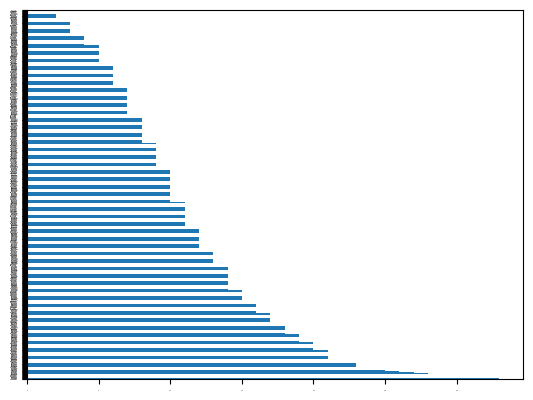

In [54]:
df_order = pd.DataFrame(data_order.copy())
df_count_cust = df_order['Customer ID'].value_counts().reindex()
df_count_cust
df_count_cust.plot.barh(fontsize=1, rot=0)


4. Comparative statistical distribution of profit per sale unit between each sub-category in
furniture category.

<AxesSubplot: ylabel='Sub-Category'>

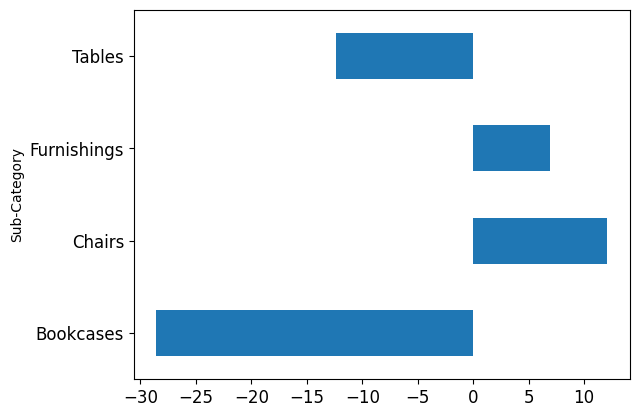

In [79]:
df_order = pd.DataFrame(data_order.copy())
sale_to_pro = df_order[ df_order['Category'] == "Furniture" ].groupby(['Sub-Category'])[['Sales','Profit']].sum()
sale_to_pro['Sales/Profit'] = sale_to_pro['Sales'] / sale_to_pro['Profit']
sale_to_pro['Sales/Profit'].plot.barh(fontsize=12)
